# 第五章： Logistic 回归

## 5.2基于最优化方法的最佳回归系数确定

### 5.2.2 训练算法： 使用梯度上升找到最佳参数

In [1]:
import numpy as np

In [2]:
# Logistic 函数
# input : 输入值 x
# return: 对应的 sigmoid 函数值
import math

def sigmoid(inX):
    return 1.0/(1.0 + np.exp(-inX) )
    

In [3]:
# loadDataSet: 打开文件 test.txt 并逐行读取
# input: none
# return: dataSet Matrix and dataSet labels

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [4]:
# gradAscent: 梯度上升方法
# input: 训练集和训练集的labels
# return: 最后得到的 weights

def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn) # 转换成Numpy矩阵数据类型 100 x 3
    labelMat = np.mat(classLabels).transpose() # 转换成Numpy矩阵数据类型 转置之后： 100 x 1
    m,n = dataMatrix.shape
    
    alpha = 0.001 # Learning rate/步长
    maxCycles = 500 # 迭代次数
    weights = np.ones((n,1)) # 初始化权重 3 x 1
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights) # 100 x 3  *  3 x 1  =  100 x 1
        error = (labelMat - h)
        # 更新权重
        weights = weights + alpha * dataMatrix.transpose() * error # 3 x 100  *  100 x 1  =  3 x 1
    
    return weights

In [5]:
dataArr, labelMat = loadDataSet()

In [6]:
weights = gradAscent(dataArr, labelMat)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

### 5.2.3 分析数据： 画出决策边界

In [7]:
# 画出数据集和 Logistic 回归最近你和直线的函数
# input: weights
# function: 画出数据集和 Logistic 回归最近你和直线的函数

def plotBestFit(weights):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    
    for i in range(n):
        # 如果 这个样本的 label 是 1
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        # 如果 这个样本的 label 是 0
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
            
    # 画图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] -weights[1]*x )/weights[2] # from w0 + w1*x1 + w2*x2 = 0
    y = y.transpose()
    ax.plot(x, y)
    
    # add legends
    class0_legend = mpatches.Patch(color='green', label='Class 0')
    class1_legend = mpatches.Patch(color='red', label='Class 1')
    plt.legend(handles=[class0_legend, class1_legend])
    
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()
    

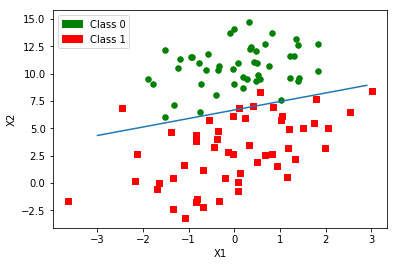

In [8]:
plotBestFit(weights)

### 5.2.4 训练算法： 随机梯度上升

In [9]:
# 随机梯度上升算法：
# 所有回归系数初始化为1
# 对数据集中每个样本
#   计算该样本的梯度
#   使用 alpha x gradient 更新回归系数值
# 返回回归系数值

# input: 训练集和训练集的 label
# return: 经过 随机梯度上升算法 的 weights

def stocGradAscent0(dataMatrix, classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n) # 初始化 weights
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha*error*dataMatrix[i]
    return weights
    

In [10]:
dataArr, labelMat = loadDataSet()

In [11]:
weights = stocGradAscent0(np.array(dataArr), labelMat)
weights

array([ 1.01702007,  0.85914348, -0.36579921])

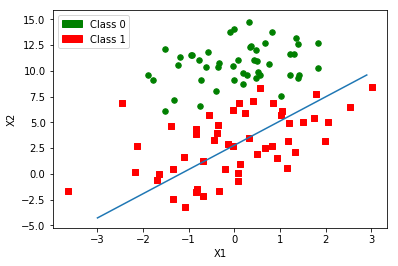

In [12]:
plotBestFit(weights)

In [13]:
# 改进的随机梯度上升算法：
# 对于每次迭代(一次迭代用一次整个的数据集)
#   所有回归系数初始化为1
#   对数据集中每个样本
#     更新 alpha
#     随机选取一个样本
#     计算该样本的梯度
#     使用 alpha x gradient 更新回归系数值
# 返回回归系数值

# input: 训练集和训练集的 label, 还有迭代次数
# return: 经过 改进的随机梯度上升算法 的 weights

import random

def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n) # 初始化 weights
    
    for j in range(numIter):
        # 本次迭代还剩的样本的 Index
        dataIndex = list(range(m))
        
        for i in range(m):
            # 更新 alpha
            alpha = 4.0/(1.0+j+i)+0.01
            # 随机选取一个样本
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha*error*dataMatrix[randIndex]
            del(dataIndex[randIndex])
            
    return weights

In [14]:
dataArr, labelMat = loadDataSet()

In [15]:
weights = stocGradAscent1(np.array(dataArr), labelMat)
weights

array([ 14.49288238,   1.06756489,  -2.00983195])

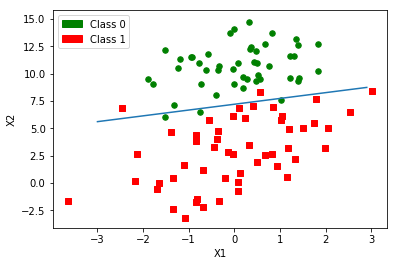

In [16]:
plotBestFit(weights)

# 5.3: 示例：利用逻辑回归从疝气病症预测病马的死亡率

## 5.3.2 测试算法：用logistic回归进行分析

In [34]:
# classifyVector: 以回归系数和特征向量作为输入来计算sigmoid函数值， 大于0.5则返回1， 否则返回0
# input: 特征向量(inX), 回归系数(weights)
# return: 0/1

def classifyVector(inX, weights):
    prob = sigmoid(sum(inX * weights ))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

In [74]:
# colicTest: 计算用 trainingSet 得到的 weights 测试 testSet 得到的 errorRate
# input: none
# return: error rate

def colicTest():
    # 打开训练集和测试集文件
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    
    # 读取trainingSet里面的每一行， 将每一行的数据存储到一个list， 并将这个list加到trainingSet中
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21): #一共21个特征变量
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
        
    # get training weights with function stocGradAscent1
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 500)
    
    # 用 trainWeights 测试 testSet 并计算错误率
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split()
        lineArr = []
        for i in range(21): #一共21个特征变量
            lineArr.append(float(currLine[i]))
        # 如果预测错误则 errorCount + 1
        if int(classifyVector(np.array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount += 1
        
    errorRate = (float(errorCount)/numTestVec)
    string = "The error rate of this test is: " + str(errorRate)
    print(string)
    return errorRate

    

In [75]:
# multiTest: 调用 colicTest 函数 numTests 次， 并求错误率的平均值
# input: 调用次数 numTests
# function: 调用 colicTest 函数 numTests 次， 并求错误率的平均值

def multiTest(numTests):
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
        
    string = "After " + str(numTests) + " iterations the average error rate is: " + str(errorSum/float(numTests))
    print(string)

In [77]:
numTests = 10
multiTest(numTests)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


The error rate of this test is: 0.40298507462686567
The error rate of this test is: 0.2537313432835821
The error rate of this test is: 0.34328358208955223
The error rate of this test is: 0.3582089552238806
The error rate of this test is: 0.373134328358209
The error rate of this test is: 0.43283582089552236
The error rate of this test is: 0.3283582089552239
The error rate of this test is: 0.373134328358209
The error rate of this test is: 0.43283582089552236
The error rate of this test is: 0.44776119402985076
After 10 iterations the average error rate is: 0.3746268656716418
